In [1]:
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
bos_hou = load_boston()
 
# Create the dataframe
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()

/Users/ziaullahmomand/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


/Users/ziaullahmomand/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

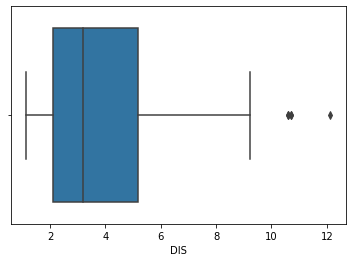

In [3]:
# Box Plot
import seaborn as sns
sns.boxplot(df_boston['DIS'])

In [4]:
# Position of the Outlier
print(np.where(df_boston['DIS']>10))

(array([351, 352, 353, 354, 355]),)


IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

IQR = Quartile3 – Quartile1


In [5]:
# IQR
Q1 = np.percentile(df_boston['DIS'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_boston['DIS'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [8]:
# Above Upper bound
upper = df_boston['DIS'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df_boston['DIS'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([351, 352, 353, 354, 355]),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([], dtype=int64),)
